In [120]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
with open('../../Downloads/distributions/big_state_reward_dict_with_actions_for_quantiles_all_data.pkl','rb') as f:
    t = pickle.load(f)

In [61]:
def get_all_states(d):
    alls = []
    for k,v in d.items():
        for l in v.values():
            states = l[0].split('-')
            state_vector = [1.0]
            if states[1]!='2':
                state_vector= state_vector+[float(states[i]) for i in range(1,len(states))]
                alls.append(state_vector)
    return alls

In [62]:
def get_all_states_act_sugg(d):
    alls = []
    for k,v in d.items():
        for l in v.values():
            states = l[0].split('-')
            state_vector = [1.0]
            if states[1]!='2' and type(l[3])!=str and l[3][1]=='sent':
                
                state_vector= state_vector+[float(states[i]) for i in range(1,len(states))]
                alls.append(state_vector)
    return alls

In [172]:
data = get_all_states(t['dict'])
len(data)

39353

In [173]:
coeffs = np.array([0.0977,0.08576116, 0.11150488,0.18145672, -0.21754123,0.25537478])

In [174]:
all_ys = [np.dot(coeffs.T,s) for s in data]

In [189]:
bins = []
for i in range(10,100,10):
    print(i)
    print(np.percentile(np.array(all_ys),i))
    bins.append(np.percentile(np.array(all_ys),i))

10
-0.008336350000000006
20
0.0977
30
0.14737665
40
0.20920487999999998
50
0.27915671999999997
60
0.31699027
70
0.36491788000000003
80
0.42849515000000005
90
0.5345315


In [190]:
np.histogram(np.array(all_ys),bins = bins)

(array([3912, 2946, 5139, 3561, 3695, 3396, 5490, 5127]),
 array([-0.00833635,  0.0977    ,  0.14737665,  0.20920488,  0.27915672,
         0.31699027,  0.36491788,  0.42849515,  0.5345315 ]))

In [196]:
len([i for i in all_ys if i>-0.00833635 and i<0.0977])

3154

In [218]:
 bins = pd.cut(np.array(all_ys),bins=10, retbins=True)

In [222]:
bins[1]

array([-0.12069287, -0.03467735,  0.05048652,  0.1356504 ,  0.22081428,
        0.30597816,  0.39114203,  0.47630591,  0.56146979,  0.64663366,
        0.73179754])

In [225]:
 for i in pd.cut(np.array(all_ys),bins=20).categories:
    print(i)
    #[print(dir(i))]
    print(len([j for j in all_ys if j>i.left and j<=i.right]))

(-0.121, -0.0773]
1354
(-0.0773, -0.0347]
0
(-0.0347, 0.0079]
2872
(0.0079, 0.0505]
0
(0.0505, 0.0931]
3154
(0.0931, 0.136]
2946
(0.136, 0.178]
3139
(0.178, 0.221]
2853
(0.221, 0.263]
2708
(0.263, 0.306]
3695
(0.306, 0.349]
2014
(0.349, 0.391]
4701
(0.391, 0.434]
2171
(0.434, 0.476]
1764
(0.476, 0.519]
1334
(0.519, 0.561]
2446
(0.561, 0.604]
0
(0.604, 0.647]
1805
(0.647, 0.689]
0
(0.689, 0.732]
397


In [227]:
(0.689--0.0773)/4

0.191575

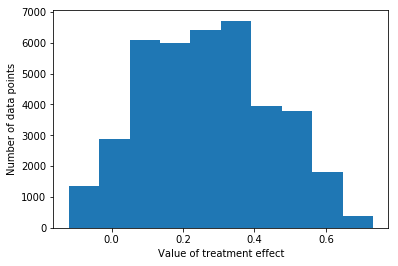

In [224]:
plt.hist(np.array(all_ys),bins=bins[1])
plt.ylabel('Number of data points')
plt.xlabel('Value of treatment effect')
plt.savefig('10_bins_all_data.png')

In [72]:
check = set([])
for i in data:
    key = '-'.join([str(j) for j in i])
    check.add(key)

In [121]:
s = pd.Series(all_ys)

In [138]:
cuts = pd.qcut(s,5,labels=[str(i) for i in range(5)])

In [139]:
sizes = {}
for i,r in cuts.iteritems():
    if r not in sizes:
        sizes[r]=[]
    sizes[r].append(i)
for k,v in sizes.items():
    print(k)
    print(len(v))

4
7551
1
8197
2
7318
3
6809
0
9478


In [137]:
4823-1957

2866

In [140]:
9478-6809

2669

In [170]:
(0.620--.034)/4

0.1635